In [1]:
# https://www.kaggle.com/datasets/shubh0799/churn-modelling/code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# to check if variables are in the correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# to check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# to check for duplicated values in dataset
duplicates = df[df.duplicated()]

In [8]:
# there are no duplicated values in dataset
duplicates

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [9]:
# to print categorical columns
df.select_dtypes('object')

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [10]:
# to print numeric columns
df.select_dtypes(['int','float'])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


In [11]:
# to remove unimportant variables not useful for analysis
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


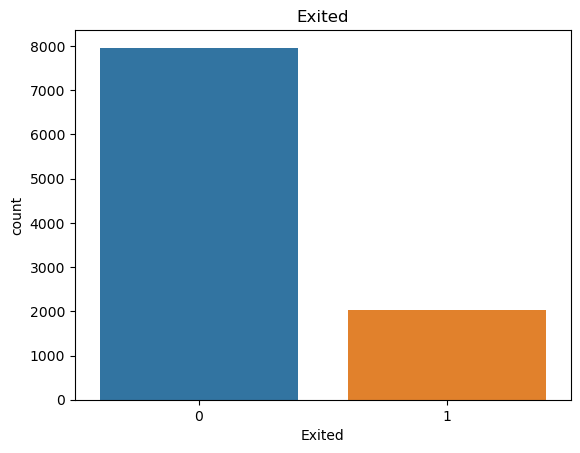

In [13]:
# target variable 'Exited', plot a countplot to see distribution
sns.countplot(data=df, x='Exited')
plt.title('Exited');

In [14]:
pd.DataFrame(df['Exited'].value_counts())

,count
Exited,
0,7963
1,2037


In [15]:
# 20 of the customers exited from Bank's products and services
100*(df['Exited'].value_counts()/len(df))

Exited
0    79.63
1    20.37
Name: count, dtype: float64

In [16]:
# to see the correlation of all numeric columns


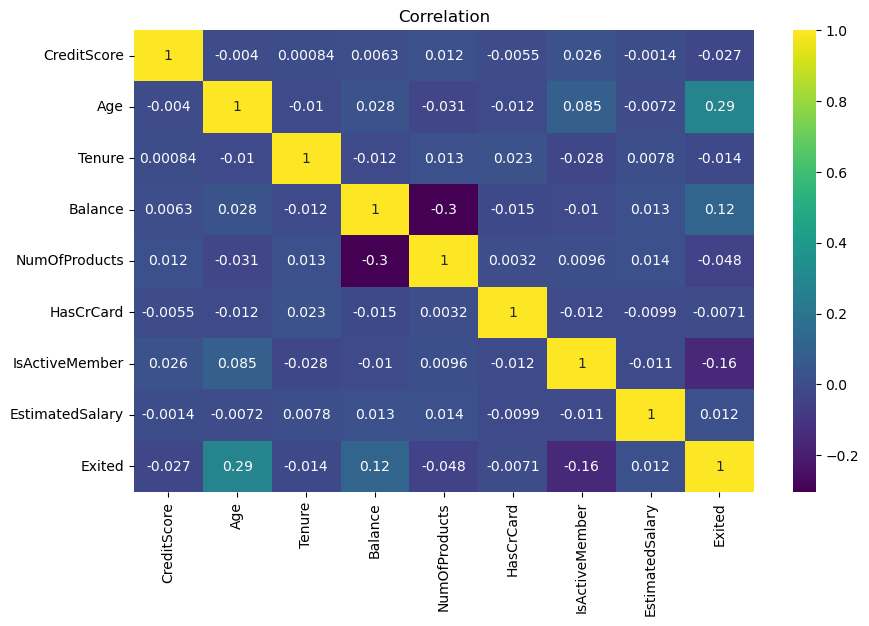

In [17]:
# to visualise the correlations in the heatmap
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(df.select_dtypes(['int','float']).corr(),annot=True, cmap='viridis')
plt.title('Correlation');

In [18]:
# to see correlation against 'Exited', target variable
# 'Age' & 'Balance' are highly correlated to whether the customers have exited from the bank
df.select_dtypes(['int','float']).corr()['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [19]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

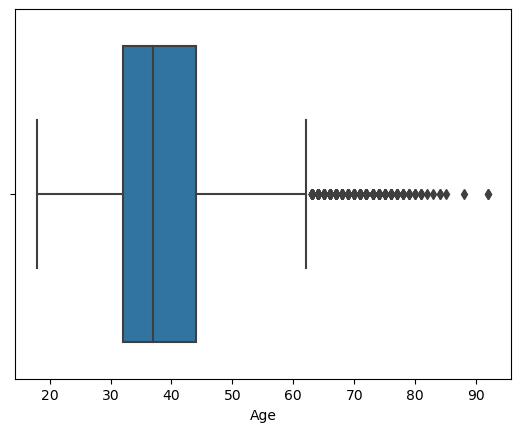

In [20]:
# the average age of banks' customers is about 39 years
sns.boxplot(data=df, x='Age');

In [21]:
# to separate 'Age' into different age group
# youngest = 18 years, oldest = 92 years
def age_categories(s):
    if 18 <= s <= 30:
        return "18 to 30"
    elif 31 <= s <= 45:
        return "31 to 45"
    elif 46 <= s <= 60:
        return "46 to 60"
    elif 61 <= s <= 75:
        return "61 to 75"
    elif 75 <= s <= 85:
        return "75 to 85"
    elif 86 <= s:
        return "above 85"

In [22]:
# to .apply customer function to original 'Age'
df['age_categories'] = df['Age'].apply(age_categories)

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_categories
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,31 to 45
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,31 to 45
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,31 to 45
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31 to 45
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,31 to 45


In [24]:
df['age_categories'].unique()

array(['31 to 45', '46 to 60', '18 to 30', '61 to 75', '75 to 85',
       'above 85'], dtype=object)

In [25]:
# to manually arrange the order in age categories
age_categories_order = ['18 to 30', 
                        '31 to 45', 
                        '46 to 60',  
                        '61 to 75', 
                        '75 to 85',
                         'above 85']

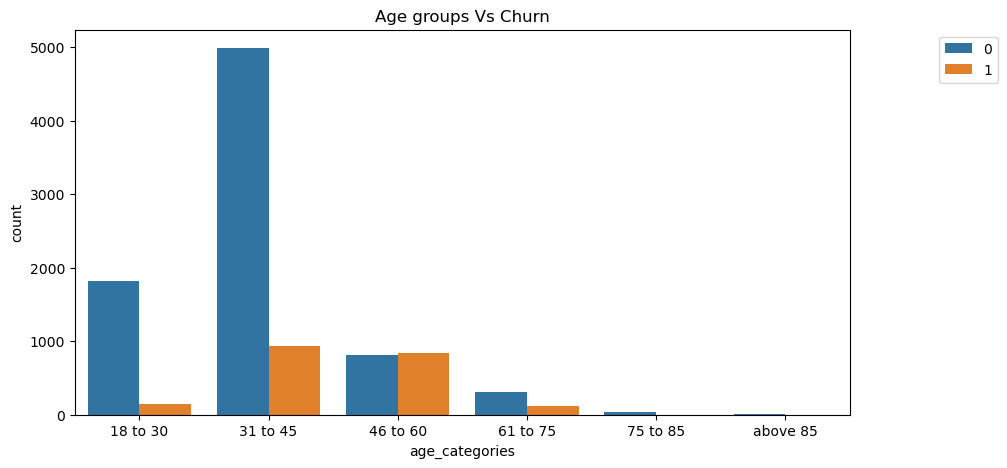

In [26]:
# to see the distribution of customers of different age group who churn
# Age groups '31 to 45', '46 to 60' churn the most
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='age_categories', order=age_categories_order, hue='Exited')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Age groups Vs Churn');

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_categories
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,31 to 45
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,31 to 45
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,31 to 45
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31 to 45
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,31 to 45


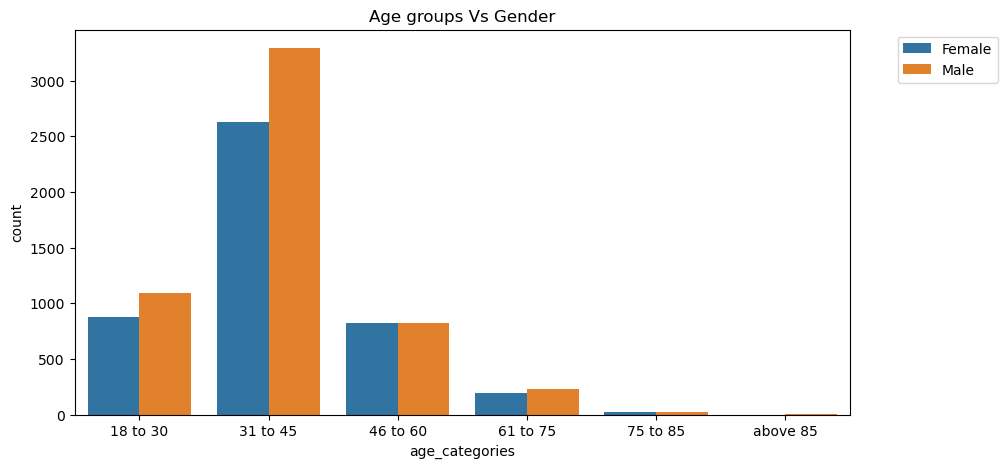

In [28]:
# majority of bank's customer fall between age 31 to 45 years
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='age_categories', order=age_categories_order, hue='Gender')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Age groups Vs Gender');

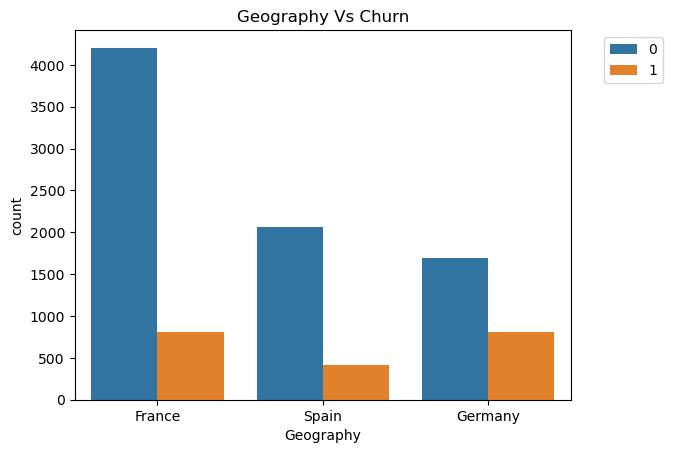

In [29]:
sns.countplot(data=df, x='Geography', hue='Exited')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Geography Vs Churn');

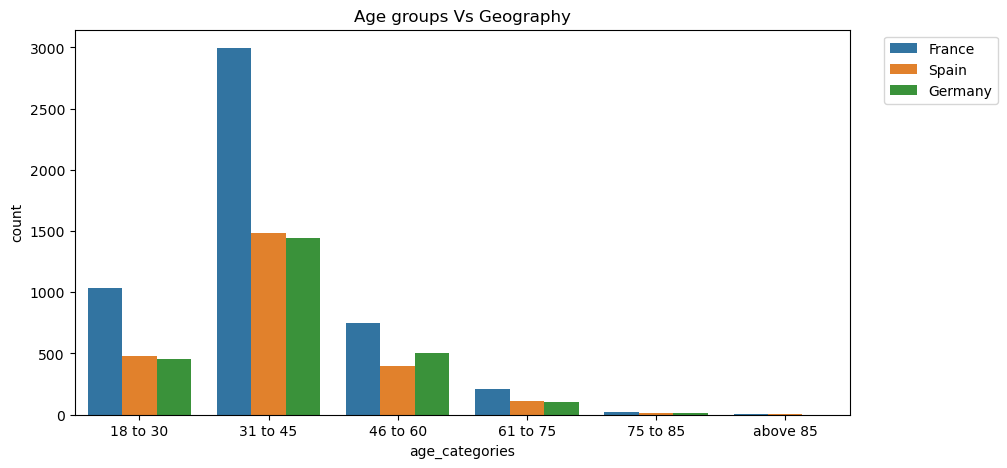

In [30]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='age_categories', order=age_categories_order, hue='Geography')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Age groups Vs Geography');

In [31]:
# Tenure: Number of years for which the client has been with the bank
# majority of the customers who churn has been with the bank for 1 year
pd.DataFrame(df.groupby(['Tenure','Exited'])['Exited'].count())

Exited
Tenure Exited        
0      0          318
       1           95
1      0          803
       1          232
2      0          847
       1          201
3      0          796
       1          213
4      0          786
       1          203
5      0          803
       1          209
6      0          771
       1          196
7      0          851
       1          177
8      0          828
       1          197
9      0          771
       1          213
10     0          389
       1          101

In [32]:
# customers who churn from the bank mostly subscribed to 1 product from the bank
pd.DataFrame(df.groupby(['NumOfProducts','Exited'])['Exited'].count())

Exited
NumOfProducts Exited        
1             0         3675
              1         1409
2             0         4242
              1          348
3             0           46
              1          220
4             1           60

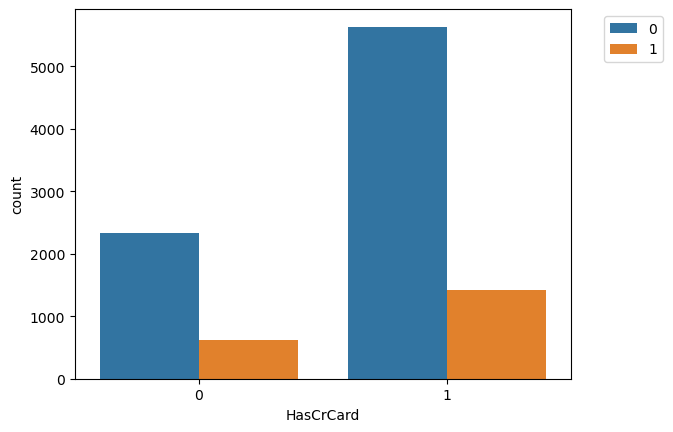

In [33]:
# customers who did not churn have at least one credit card with the bank
sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.legend(bbox_to_anchor=(1.2,1.0));

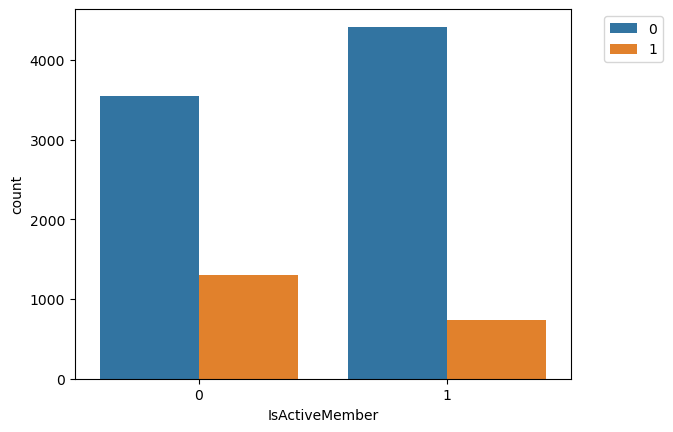

In [34]:
# customers who churn are not active members of the bank
sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.legend(bbox_to_anchor=(1.2,1.0));

In [35]:
# to remove 'age_categories'
df = df.drop('age_categories', axis=1)

In [36]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
# to convert categorical columns Geograph and Gender to dummies variable before Neural network algorithms
# Drop_first = True, to remove first column to remove multicollinearity in dataset
dummies = pd.get_dummies(df[['Geography','Gender']], drop_first=True)

In [38]:
# to concatenate the dummies dataframe to to original dataset
df = pd.concat([df,dummies],axis=1)

In [39]:
# to remove the orginal Geography and Gender from dataframe
df = df.drop(['Geography','Gender'],axis=1)

In [40]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [41]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [42]:
# to define X and y
# .values because using tensorflow ANN classifier
X = df.drop('Exited',axis=1).values

In [43]:
y = df['Exited'].values

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
# testing set = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [47]:
scaler = StandardScaler()

In [48]:
# to fit scaler to training set X only to prevent data leakage to unseen data, y
X_train = scaler.fit_transform(X_train)

In [49]:
X_test = scaler.transform(X_test)

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [51]:
X_train.shape

(8000, 11)

In [52]:
# to create the ANN classifier model
model = Sequential()

model.add(Dense(11,activation='relu')) # 11 neurons
model.add(Dropout(0.2)) # dropout layer to prevent overfitting of datasets

model.add(Dense(6,activation='relu')) # 6 neurons
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid')) # output neurons

model.compile(loss='binary_crossentropy', optimizer='adam')

In [53]:
# to fit the model for 25 epochs
model.fit(x=X_train , y=y_train, epochs=25, batch_size=100,
         validation_data=(X_test,y_test))

Epoch 1/25
80/80 [==============================] - 1s 5ms/step - loss: 0.6343 - val_loss: 0.5691
Epoch 2/25
80/80 [==============================] - 0s 3ms/step - loss: 0.5672 - val_loss: 0.5178
Epoch 3/25
80/80 [==============================] - 0s 2ms/step - loss: 0.5300 - val_loss: 0.4855
Epoch 4/25
80/80 [==============================] - 0s 2ms/step - loss: 0.5080 - val_loss: 0.4601
Epoch 5/25
80/80 [==============================] - 0s 2ms/step - loss: 0.4857 - val_loss: 0.4411
Epoch 6/25
80/80 [==============================] - 0s 2ms/step - loss: 0.4659 - val_loss: 0.4255
Epoch 7/25
80/80 [==============================] - 0s 2ms/step - loss: 0.4634 - val_loss: 0.4156
Epoch 8/25
80/80 [==============================] - 0s 2ms/step - loss: 0.4555 - val_loss: 0.4078
Epoch 9/25
80/80 [==============================] - 0s 2ms/step - loss: 0.4402 - val_loss: 0.3992
Epoch 10/25
80/80 [==============================] - 0s 2ms/step - loss: 0.4382 - val_loss: 0.3940
Epoch 11/25
80/80 [

In [54]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,0.634278,0.569128
1,0.567185,0.517819
2,0.530017,0.485486
3,0.508046,0.460130
4,0.485739,0.441094
5,0.465902,0.425463
6,0.463397,0.415631
7,0.455470,0.407820
8,0.440204,0.399160
9,0.438232,0.394026


In [55]:
# to plot out the validation loss(test) vs the training loss
losses = pd.DataFrame(model.history.history)

<Axes: >

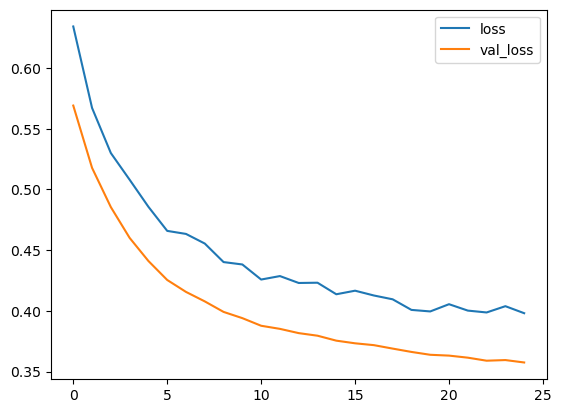

In [56]:
losses.plot()

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

63/63 [==============================] - 0s 2ms/step


In [59]:
print((confusion_matrix(y_test,predictions)))
print('\n')
print(classification_report(y_test,predictions)) # ANN Classifier model is 86% accurate

[[1544   33]
 [ 254  169]]


              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1577
           1       0.84      0.40      0.54       423

    accuracy                           0.86      2000
   macro avg       0.85      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [60]:
# accuracy of original data
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [61]:
# 79.6% accuracy rate of the original model
7963/len(df)

0.7963